In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from joblib import Parallel, delayed
from multiprocessing import cpu_count
from sklearn.metrics import mean_squared_log_error

In [2]:
dataset = pd.read_csv('../data/processed/preprocessed.csv')

In [3]:
dataset.head()

PUBBLICITA  TIPO_PUBBLICITA  CODICE_GIOCO  RILANCIO_PUBBLICITA   SESSIONE  \
0         1.0              3.0             1                    5  117174037   
1         1.0              3.0             1                    5  117405438   
2         1.0              3.0             1                   10  117264731   
3         1.0              3.0             1                   10  117354998   
4         1.0              3.0             1                   22  121856100   

   NUMERO_CLICK_SITO  OFFERTA_PROMOZIONALE  MACRO_CATEGORIA_GIOCO  \
0               5310                   0.0                      2   
1               5310                   0.0                      2   
2               5310                   0.0                      2   
3               5310                   0.0                      2   
4               5310                   0.0                      2   

   MICRO_CATEGORIA_GIOCO  AREA_CLICK  NUMERO_PUBBLICITA_CONCORRENTI      ID  \
0                      1           0                              1  115713   
1                      1           0                              1  115714   
2                      1           0                              1  116028   
3                      1           0                              1  116030   
4                      1           0                              1  116874   

   GIORNO_FINE_PUBBLICITA  MESE_FINE_PUBBLICITA  ANNO_FINE_PUBBLICITA  \
0                      12                     2                  2016   
1                      16                     2                  2016   
2                      14                     2                  2016   
3                      15                     2                  2016   
4                       5                     4                  2016   

   GIORNO_DATA  ANNO_DATA  DURATA_GIORNI  FASCIA_PCA  
0           12       2016           5886    1.827953  
1           16       2016           5890    1.827953  
2           14       2016           5888    1.827953  
3           15       2016           5889    1.827953  
4            5       2016           5939    1.827953

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113243 entries, 0 to 113242
Data columns (total 19 columns):
PUBBLICITA                       113243 non-null float64
TIPO_PUBBLICITA                  113243 non-null float64
CODICE_GIOCO                     113243 non-null int64
RILANCIO_PUBBLICITA              113243 non-null int64
SESSIONE                         113243 non-null int64
NUMERO_CLICK_SITO                113243 non-null int64
OFFERTA_PROMOZIONALE             113243 non-null float64
MACRO_CATEGORIA_GIOCO            113243 non-null int64
MICRO_CATEGORIA_GIOCO            113243 non-null int64
AREA_CLICK                       113243 non-null int64
NUMERO_PUBBLICITA_CONCORRENTI    113243 non-null int64
ID                               113243 non-null int64
GIORNO_FINE_PUBBLICITA           113243 non-null int64
MESE_FINE_PUBBLICITA             113243 non-null int64
ANNO_FINE_PUBBLICITA             113243 non-null int64
GIORNO_DATA                      113243 non-null int64
ANN

In [5]:
dataset.describe()

PUBBLICITA  TIPO_PUBBLICITA   CODICE_GIOCO  RILANCIO_PUBBLICITA  \
count  113243.000000    113243.000000  113243.000000        113243.000000   
mean      388.836944       146.431214     394.063774            94.168134   
std      1219.857541      2271.450330     224.343369            51.438463   
min         1.000000         1.000000       1.000000             1.000000   
25%        89.000000         3.000000     199.000000            52.000000   
50%       210.000000         4.000000     439.000000            98.000000   
75%       616.000000         5.000000     612.000000           141.000000   
max     28256.000000     41368.000000     807.000000           181.000000   

           SESSIONE  NUMERO_CLICK_SITO  OFFERTA_PROMOZIONALE  \
count  1.132430e+05      113243.000000         113243.000000   
mean   1.235626e+08        5540.905486              0.149795   
std    4.159225e+06         382.467285              0.137200   
min    1.163034e+08         861.000000              0.000000   
25%    1.199737e+08        5340.000000              0.000000   
50%    1.236660e+08        5489.000000              0.140000   
75%    1.268792e+08        5660.000000              0.228000   
max    1.349159e+08       12829.000000              2.778000   

       MACRO_CATEGORIA_GIOCO  MICRO_CATEGORIA_GIOCO     AREA_CLICK  \
count          113243.000000               113243.0  113243.000000   
mean                1.988626                    1.0       5.055986   
std                 0.468515                    0.0      15.189818   
min                 1.000000                    1.0       0.000000   
25%                 2.000000                    1.0       0.000000   
50%                 2.000000                    1.0       0.000000   
75%                 2.000000                    1.0       0.000000   
max                 3.000000                    1.0     115.000000   

       NUMERO_PUBBLICITA_CONCORRENTI             ID  GIORNO_FINE_PUBBLICITA  \
count                  113243.000000  113243.000000           113243.000000   
mean                        1.688970   84003.122701               16.101048   
std                         3.407253   48483.635502                9.671532   
min                         0.000000       1.000000                1.000000   
25%                         0.000000   42275.500000                8.000000   
50%                         1.000000   84886.000000               15.000000   
75%                         1.000000  125838.500000               25.000000   
max                        37.000000  167839.000000               31.000000   

       MESE_FINE_PUBBLICITA  ANNO_FINE_PUBBLICITA    GIORNO_DATA  \
count         113243.000000         113243.000000  113243.000000   
mean               4.847999           2016.009440      15.034015   
std                2.019860              0.270058       8.390098   
min                1.000000           2010.000000       1.000000   
25%                3.000000           2016.000000       8.000000   
50%                5.000000           2016.000000      14.000000   
75%                6.000000           2016.000000      22.000000   
max               12.000000           2018.000000      31.000000   

           ANNO_DATA  DURATA_GIORNI    FASCIA_PCA  
count  113243.000000  113243.000000  1.132430e+05  
mean     2015.967821    1649.089851 -5.621948e-16  
std         0.473776    2635.795730  2.740475e+00  
min      2008.000000       0.000000 -2.402073e+00  
25%      2016.000000      12.000000 -2.402073e+00  
50%      2016.000000      18.000000 -2.402073e+00  
75%      2016.000000    5884.000000  1.827953e+00  
max      2018.000000    6156.000000  6.166955e+00

In [6]:
dataset = dataset.drop('ID', axis=1)

In [7]:
X,y = dataset.drop('NUMERO_CLICK_SITO', axis=1).as_matrix(), dataset['NUMERO_CLICK_SITO']

## Validation phase
- Simple validation because dataset is too big for my pc to do a cross validation

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=13)

In [12]:
def validate(**model_params):
    rf = RandomForestRegressor(**model_params)
    rf.fit(X_train, y_train)
    pred_val = rf.predict(X_val)
    pred_train = rf.predict(X_train)
    val_error = mean_squared_log_error(y_val, pred_val)
    train_error = mean_squared_log_error(y_train, pred_train)
    return train_error, val_error

In [16]:
validate(n_estimators=200, n_jobs=-1)

(0.00025340225936832598, 0.0014224292790410663)

In [24]:
def validate_n_estimators(range_n_estimators):
    return Parallel(n_jobs=cpu_count())(delayed(validate)(n_estimators=val) for val in range_n_estimators)

In [25]:
error_n_estimators = list(validate_n_estimators(range(200,1001,200)))
train_errs, val_errs = list(zip(*error_n_estimators))

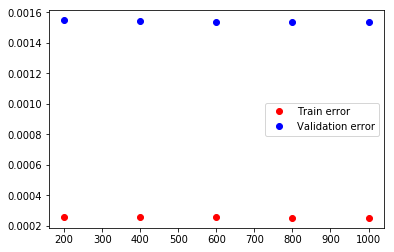

In [31]:
%matplotlib inline
x_plot = list(range(200,1001,200))
plt.plot(x_plot, train_errs, 'o', color='r', label='Train error')
plt.plot(x_plot, val_errs, 'o', color='b', label='Validation error')
plt.legend()

In [13]:
def validate_min_samples_split(range_min_samples_split):
    return Parallel(n_jobs=cpu_count())(delayed(validate)(min_samples_split=val, n_estimators=200) for val in range_min_samples_split)

In [14]:
error_min_samples_split = list(validate_min_samples_split(range(5, 21, 5)))
train_errs_min_samples_split, val_errs_min_samples_split = list(zip(*error_min_samples_split))

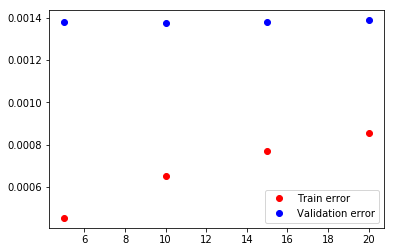

In [16]:
%matplotlib inline
x_plot = list(range(5, 21, 5))
plt.plot(x_plot, train_errs_min_samples_split, 'o', color='r', label='Train error')
plt.plot(x_plot, val_errs_min_samples_split, 'o', color='b', label='Validation error')
plt.legend()

In [20]:
error_min_samples_split_2 = list(validate_min_samples_split(range(25, 41, 5)))
train_errs_min_samples_split_2, val_errs_min_samples_split_2 = list(zip(*error_min_samples_split_2))

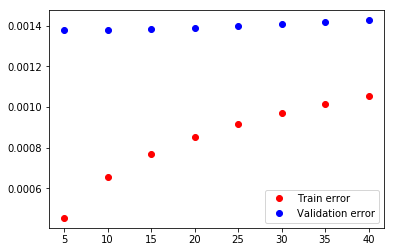

In [27]:
%matplotlib inline
x_plot = list(range(5, 41, 5))
plt.plot(x_plot, train_errs_min_samples_split + train_errs_min_samples_split_2[1:], 'o', color='r', label='Train error')
plt.plot(x_plot, val_errs_min_samples_split + val_errs_min_samples_split_2[1:], 'o', color='b', label='Validation error')
plt.legend()

In [28]:
error_min_samples_split_3 = list(validate_min_samples_split(range(45, 71, 5)))
train_errs_min_samples_split_3, val_errs_min_samples_split_3 = list(zip(*error_min_samples_split_3))

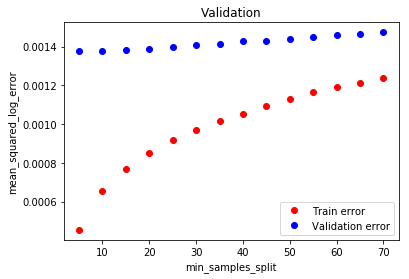

In [30]:
%matplotlib inline
x_plot = list(range(5, 71, 5))
plt.xlabel('min_samples_split')
plt.ylabel('mean_squared_log_error')
plt.title('Validation')
train_err_mss =  train_errs_min_samples_split + train_errs_min_samples_split_2[1:] + train_errs_min_samples_split_3
val_err_mss = val_errs_min_samples_split + val_errs_min_samples_split_2[1:] + val_errs_min_samples_split_3
plt.plot(x_plot, train_err_mss, 'o', color='r', label='Train error')
plt.plot(x_plot, val_err_mss, 'o', color='b', label='Validation error')
plt.legend()